In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('laptops.csv')
data.sample()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
869,Dell,Workstation,8,2.23,11.458805,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows


In [4]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [5]:
num_ft = data.select_dtypes(include=['float64', 'int64']).columns

cat_ft = data.select_dtypes(include=['object']).columns


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_ft:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_ft] = scaler.fit_transform(data[num_ft])

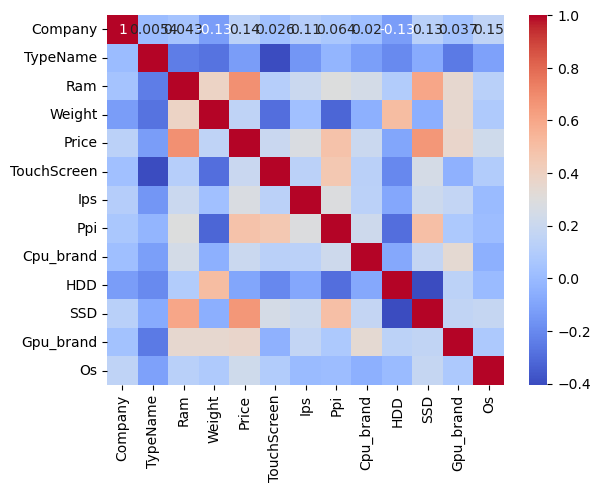

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop('Price', axis=1)
y = data['Price']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor()
rf.fit(X, y)

y_pred_rf = rf.predict(X_test)

In [10]:
rf.score(X_test,y_test)

0.982591529128928

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regressor Performance')
print('Mean Squared Error : ',mse_rf)
print('Mean Absolute Error : ',mae_rf)
print('R-Squared : ',r2_rf)

Random Forest Regressor Performance
Mean Squared Error :  0.017978725352977246
Mean Absolute Error :  0.1029916550114006
R-Squared :  0.982591529128928


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr.score(X_test,y_test)

0.6677584828673422

In [14]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Performance')
print('Mean Squared Error : ',mse_lr)
print('Mean Absolute Error : ',mae_lr)
print('R-Squared : ',r2_lr)

Linear Regression Performance
Mean Squared Error :  0.34312485178181
Mean Absolute Error :  0.47594154765422086
R-Squared :  0.6677584828673422


In [15]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt.score(X_test,y_test)

0.8020157761717622

In [16]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('Decision Tree Performance')
print('Mean Squared Error : ',mse_dt)
print('Mean Absolute Error : ',mae_dt)
print('R-Squared : ',r2_dt)

Decision Tree Performance
Mean Squared Error :  0.20446965220507432
Mean Absolute Error :  0.33155896710080673
R-Squared :  0.8020157761717622


In [17]:
model_info={
    'Model':['Linear Regression','Decision tree','Random Forest Regressor'],
    'MAE':[mae_lr,mae_dt,mae_rf],
    'MSE':[mse_lr,mse_dt,mse_rf],
    'R2':[r2_lr,r2_dt,r2_rf],  
}
performance = pd.DataFrame(model_info)
performance

,Model,MAE,MSE,R2
0,Linear Regression,0.475942,0.343125,0.667758
1,Decision tree,0.331559,0.204470,0.802016
2,Random Forest Regressor,0.102992,0.017979,0.982592


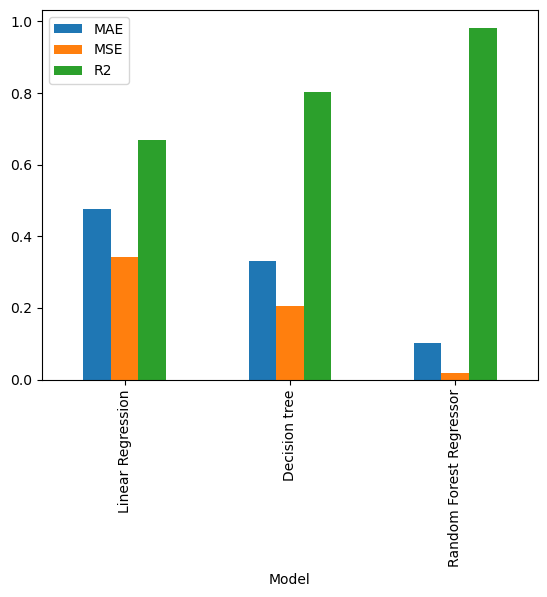

In [18]:
performance.plot(kind='bar', x= 'Model')
plt.show()

### Best model is Random Forest Regressor 
##### as R-Squared is higher in Random Forest Regressor as compared to Linear regression and Decision Tree.

In [19]:
print(f'Random Forest Regressor Performance on Test Set:\n\tMSE: {mse_rf}\n\tMAE: {mae_rf}\n\tR2 Score: {r2_rf}')

Random Forest Regressor Performance on Test Set:
	MSE: 0.017978725352977246
	MAE: 0.1029916550114006
	R2 Score: 0.982591529128928


In [20]:
def laptop_price(company, typename, ram, weight, touchscreen, ips, ppi, cpu_brand, hdd, ssd, gpu_brand, os):
    features = {
        'Company': company,
        'TypeName': typename,
        'Ram': ram,
        'Weight': weight,
        'TouchScreen': touchscreen,
        'Ips': ips,
        'Ppi': ppi,
        'Cpu_brand': cpu_brand,
        'HDD': hdd,
        'SSD': ssd,
        'Gpu_brand': gpu_brand,
        'Os': os
    }
    
    input_data = pd.DataFrame([features])
    predicted_price = rf.predict(input_data)
    return predicted_price[0]

print(laptop_price(4, 1, 16, 1.5, 1, 1, 227, 3, 0, 512, 2, 2))


1.9370890995564134
